In [84]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
data = pd.read_csv('albedo_df.csv')
data

,LWN,ST2,ME,SWD,RF,SF,SHF,LHF,SP,CD,CM,TT,QQ,UU,VV,albedo,AL2
0,-81.405365,0.793649,-0.0,319.877533,0.000029,0.000000,0.570751,-8.194850,1005.475525,0.000892,0.032646,0.884998,3.683686,-4.307622,-2.732014,42.0,0.106066
1,-22.277954,-0.948223,-0.0,224.060745,0.015567,1.760800,-4.124896,-9.705667,1007.914429,0.854793,0.111737,-1.240280,3.285548,-0.943526,-3.329368,47.0,0.106066
2,-24.148315,-0.974932,-0.0,227.148911,0.005117,1.902325,-3.175040,-10.252491,1007.974976,0.817925,0.144949,-1.171180,3.280511,-1.208542,-3.220073,50.0,0.106066
3,-59.185715,-15.376113,-0.0,331.896942,0.000000,0.057956,-2.856114,-6.925494,815.419678,0.297331,0.535164,-15.663353,1.055511,0.506285,0.137286,43.0,0.809556
4,-60.618423,-16.057201,-0.0,342.072052,0.000000,0.001516,-4.391278,-6.915388,827.355469,0.263615,0.513364,-14.785006,1.072736,0.160142,-0.550664,46.0,0.812020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356341,-38.480347,-2.801048,-0.0,40.567474,0.001363,0.000062,13.905147,-6.771992,938.586365,0.614252,0.567858,-0.384348,2.570024,5.643209,5.131199,54.0,0.560509
1356342,-32.618835,-3.483302,-0.0,38.110943,0.013978,0.018440,19.953880,-14.615985,920.901917,0.634678,0.599840,-1.710700,2.599842,4.001080,6.788464,2.0,0.560934
1356343,-28.679321,-4.452302,-0.0,45.021790,0.000000,0.025142,23.695633,-18.981661,898.482361,0.632983,0.486042,-3.463650,2.656041,6.198557,4.678786,1.0,0.576611
1356344,-39.175232,-2.122902,-0.0,40.334507,0.001691,0.000048,18.199335,-10.257481,944.069824,0.542440,0.517080,0.494819,2.618201,7.104030,4.543563,44.0,0.560155


### Explore ST2

In [86]:
data['ST2'].mode()
# many of st2 equals to 0.

0    0.0
Name: ST2, dtype: float64

In [70]:
# take out columns where st2=-1.799988
data_st2_refined=data_refined[data_refined['ST2']!=0]

# keep columns where st2=-1.799988
data_st2_mode=data_refined[data_refined['ST2']==0]

# we want to compare the distributions of other variables under the two circumstances

In [87]:
data_ST2above0 = data[(data['ST2']>=0)]
data_ST2below0 = data[(data['ST2']<0)]

#### Difference in variables

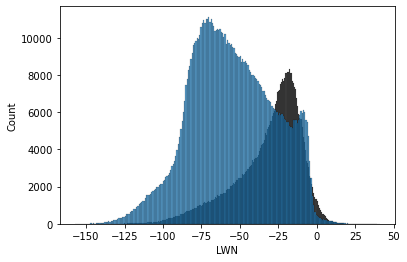

In [88]:
sns.histplot(data_ST2above0['LWN'],color = 'black')
sns.histplot(data_ST2below0['LWN']);
# shift in mode. less bimodal for data with ST2 <= 0

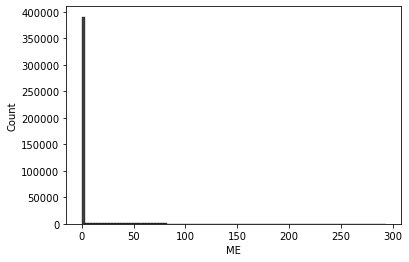

In [90]:
sns.histplot(data_ST2above0['ME'], bins=100,  color = 'black');
sns.histplot(data_ST2below0['ME'], bins=100);
sns.histplot(data['ME'], bins=100);
# many zeros when ST2>=0

In [92]:
print(data_ST2above0[data_ST2above0['ME']!=0])
print(data_ST2above0[(data_ST2above0['ME']!=0)&data_ST2above0['ST2']!=0])
#ME(Snow/ice meltwater production within the sector 1)are all zeros when ST2>0
#Makes more sense if we use trees

               LWN  ST2         ME         SWD         RF        SF  \
277     -64.497620  0.0  27.322073  354.705688   0.000101  0.000000   
526     -81.463257  0.0  27.231091  274.381195   0.000340  0.000000   
798     -31.810120  0.0  12.984070  305.593781   0.000128  0.000000   
800     -53.878784  0.0  15.691995  235.160217   2.425714  0.000000   
801     -62.081604  0.0  19.074677  227.396530   1.431262  0.007413   
...            ...  ...        ...         ...        ...       ...   
1355610 -37.128265  0.0  16.206665   77.581535   1.291459  0.321232   
1355614 -42.039825  0.0  19.049835   86.292534   1.508530  0.032676   
1355995  -1.400513  0.0   6.908249   56.599606  14.342259  6.495927   
1355997 -12.167145  0.0  87.919739   33.299049  25.493618  0.000000   
1356105 -36.768097  0.0  38.506409   63.572170   0.191353  0.000677   

               SHF        LHF           SP        CD        CM        TT  \
277      63.275345  -9.924376   977.102600  0.002162  0.000292  5.18696

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


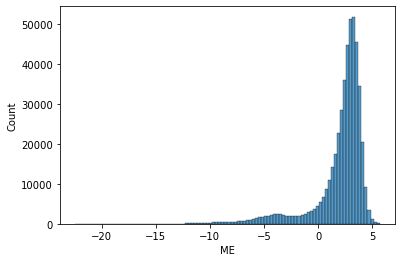

In [93]:
sns.histplot(np.log(data['ME']), bins=100);

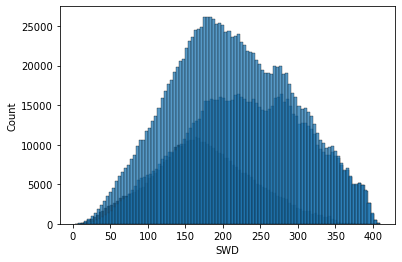

In [94]:
sns.histplot(data_ST2above0['SWD'], bins=100,  color = 'black')
sns.histplot(data_ST2below0['SWD'], bins=100);
sns.histplot(data['SWD'], bins=100);
# slight shift in mode

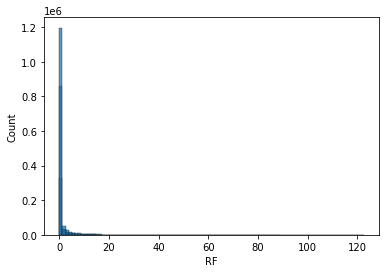

In [95]:
sns.histplot(data_ST2above0['RF'], bins=100,  color = 'black')
sns.histplot(data_ST2below0['RF'], bins=100);
sns.histplot(data['RF'], bins=100);
# No difference
# Also for CD CM TT UU VV
# CD CM highlt skewed. still skewed after log transformation, but transformation helps anyway.

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


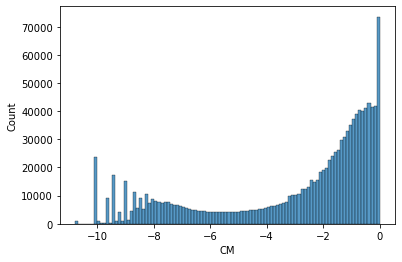

In [96]:
sns.histplot(np.log(data['CM']), bins=100);

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


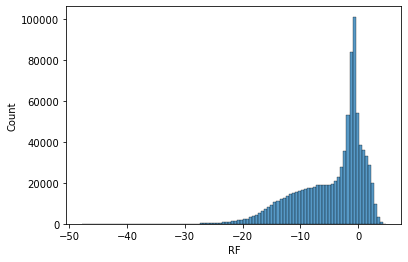

In [97]:
sns.histplot(np.log(data['RF']),bins=100);

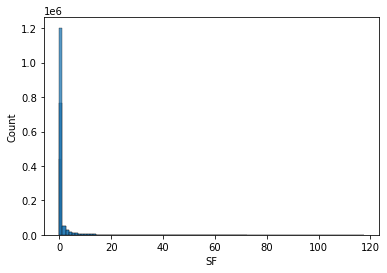

In [98]:
sns.histplot(data_ST2above0['SF'], bins=100,  color = 'black')
sns.histplot(data_ST2below0['SF'], bins=100);
sns.histplot(data['SF'], bins=100);
# More zeros for SFs when ST2>0

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


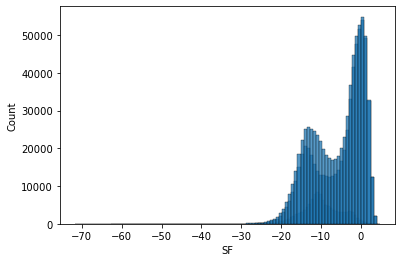

In [99]:
sns.histplot(np.log(data_ST2above0['SF']),bins=100);
sns.histplot(np.log(data_ST2below0['SF']),bins=100);
sns.histplot(np.log(data['SF']),bins=100);

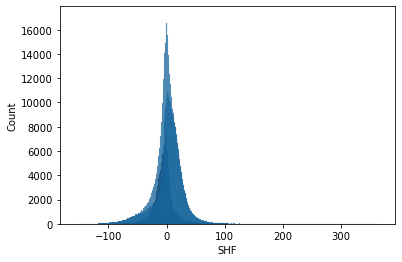

In [100]:
sns.histplot(data_ST2above0['SHF'], color = 'black')
sns.histplot(data_ST2below0['SHF']);
sns.histplot(data['SHF']);
# slight shift in mode

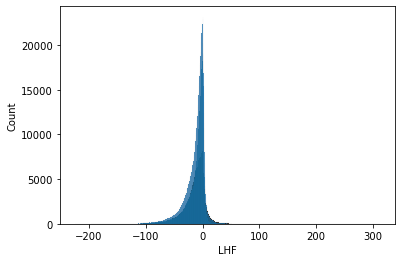

In [103]:
sns.histplot(data_ST2above0['LHF'], color = 'black')
sns.histplot(data_ST2below0['LHF']);
sns.histplot(data['LHF']);
# slight shift in mode

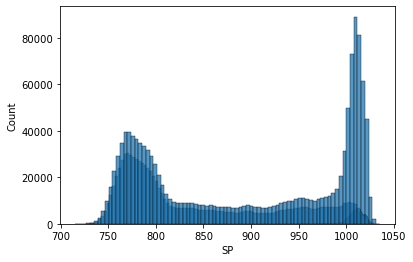

In [104]:
sns.histplot(data_ST2above0['SP'], color = 'black')
sns.histplot(data_ST2below0['SP']);
sns.histplot(data['SP']);
#sns.histplot(data['SP'], color = 'grey');
# SP: Surface atmospheric pressure
# When ST2 > 0, SP normal distribution. 
# When ST2 <= 0, the distribution has a mode around 770 and are close to uniform from 800-1000

<AxesSubplot:xlabel='QQ', ylabel='Count'>

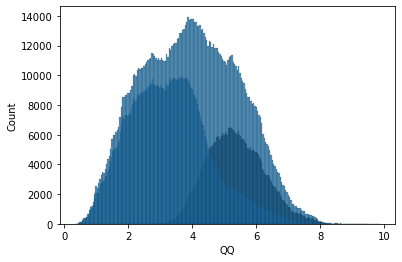

In [105]:
sns.histplot(data_ST2above0['QQ'], color = 'black')
sns.histplot(data_ST2below0['QQ']);
sns.histplot(data['QQ'])
# shift in mode

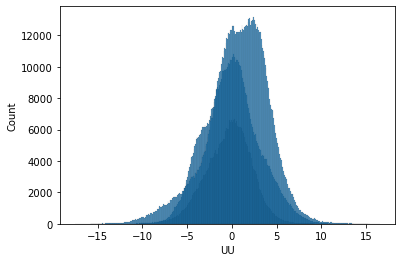

In [106]:
sns.histplot(data_ST2above0['UU'], color = 'black')
sns.histplot(data_ST2below0['UU']);
sns.histplot(data['VV']);

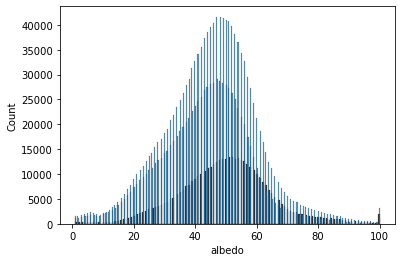

In [107]:
sns.histplot(data_ST2above0['albedo'], color = 'black')
sns.histplot(data_ST2below0['albedo']);
sns.histplot(data['albedo']);
# slight difference

In [102]:
data_st2_mode['albedo'].max()
# has many 51s! from the upper plot

100.0